<a href="https://colab.research.google.com/github/jcordovaj/ColabEjercicios/blob/main/Homework_04_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica Clase 4

## Biblioteca Pandas


## Introducción

* Las filas y columnas están identificados con etiquetas, además de simples índices enteros
* Es importante entender un poco de las estructuras de Pandas
* Tres estructuras importantes:
    + `Series`
    + `DataFrame`
    + `Index`

In [1]:
import numpy as np
import pandas as pd

## Objetos `Series` en Pandas

* Puede pensarse como una array de una sola dimensión indexado. 
* Puede ser creado desde una lista:

In [ ]:
data = pd.Series([0.25, 0.5, 0.75, 1.0, 1.3])
data

0    0.25
1    0.50
2    0.75
3    1.00
4    1.30
dtype: float64

* Una ``Series`` encapsula tanto una secuencia de valores como una de índices.
* Podemos acceder a ellos con los atributos `values` e `index`

In [ ]:
data.values

array([0.25, 0.5 , 0.75, 1.  , 1.3 ])

* Un `index` es un objeto similar a un array.

In [ ]:
data.index

RangeIndex(start=0, stop=5, step=1)

* Podemos acceder a una `Series` a través del índice asociado de forma similar a los arrays de Numpy: con los `[]` 


In [ ]:
data[1]

0.5

In [ ]:
data[2:]

2    0.75
3    1.00
4    1.30
dtype: float64

### ``Series`` como generalización de un array de  NumPy 

* La diferencia esencial con un array de Numpy es que mientras que el array tiene un índice entero *"implícitamente definido"*, una `Series` de Pandas tiene un índice asociado a los valores *que está definido de forma explícita*
* Este índice explícito le da a una `Series` capacidades adicionales.
* El índice explícito no tiene por qué ser un entero y tampoco todos sus valores tienen que ser necesariamente únicos.

* Pueden ser `strings` 

In [3]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=['a', 'b', 'c', 'd'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [4]:
data.index

Index(['a', 'b', 'c', 'd'], dtype='object')

* Y podemos acceder simplemente:

In [5]:
data['b']

0.5

* O puede ser una secuencia no contigua de `int`s

In [21]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=[2, 5, 3, 1])
data

2    0.25
5    0.50
3    0.75
1    1.00
dtype: float64

In [ ]:
data[5]

0.5

### ``Series`` como un `dict` especializado

* Un `dict` es una estructura que mapea un set de keys arbitrarias a un set de valores de un tipo.
* Puede hacerse, entonces, una analogía entre una `Series` y un `dict`

In [20]:
population_dict = {'California': 38332521,
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135}

population = pd.Series(population_dict)
population

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

In [22]:
population.values

array([38332521, 26448193, 19651127, 19552860, 12882135])

In [23]:
population.index

Index(['California', 'Texas', 'New York', 'Florida', 'Illinois'], dtype='object')

* Puede crearse una `Series` a partir de un `dict`: el índice se toma de las keys.
* Así, puede accederse de forma análoga a un `dict`.

In [24]:
population['California']

38332521

* A diferencia de un `dict` una `Series` soporta algunas operaciones del estilo de un array, como por ejemplo, slicing:

In [25]:
population['California':'New York']

California    38332521
Texas         26448193
New York      19651127
dtype: int64

* Si creamos una `Series` con una lista de strings se respeta el orden de las columnas, mientras que las claves de los `dicts` se ordenan alfabéticamente al crearse la `Series`

In [26]:
states_list = ['Illinois','Texas','New York', 'Florida', 'California']
states_pop = [12882135, 26448193, 19651127, 19552860, 38332521]
states = pd.Series(states_pop, index= states_list)

In [28]:
states['Illinois':'New York']

Illinois    12882135
Texas       26448193
New York    19651127
dtype: int64

### Construyendo objetos Series

* Podemos construir `Series` desde cero. La forma general de hacerlo es la siguiente:

```python
>>> pd.Series(data, index=index)
```
* `index` es un argumento opcional y `data` puede ser varias cosas

In [29]:
# Una lista o un array de Numpy
pd.Series([2, 4, 6])

0    2
1    4
2    6
dtype: int64

In [30]:
# Un escalar repetido a lo largo de un índice
pd.Series(5, index = [100, 200, 300])

100    5
200    5
300    5
dtype: int64

In [31]:
# Un diccionario
pd.Series({2:'a', 1:'b', 3:'c'}) 

2    a
1    b
3    c
dtype: object

In [32]:
# En cada caso, podría usarse el índice explícitamente si lo que se busca es otro resultado
pd.Series({2:'a', 1:'b', 3:'c'}, index=[3, 2]) 

3    c
2    a
dtype: object

## Objeto `DataFrame`

* Otra estructura fundamental. 
* También puede ser pensada como una generalización de un array de NumPy o como un tipo especial de diccionario.

### `DataFrame` como un array de Numpy

* Un `DataFrame` es un tipo análogo a una `Series` en dos dimensiones y, por lo tanto, puede ser una pensado tanto como una generalización de un array de Numpy o como un conjunto de `Series` alineados. Es decir, que tienen el mismo índice.

* Para demostrar esto generemos una `Serie` con el área de algunos estados:

In [33]:
area_dict = {'California': 423967, 'Texas': 695662, 'New York': 141297,
             'Florida': 170312, 'Illinois': np.nan}
area = pd.Series(area_dict)
area

California    423967.0
Texas         695662.0
New York      141297.0
Florida       170312.0
Illinois           NaN
dtype: float64

In [34]:
population

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

* Ahora, podemos usar un diccionario para construir un objeto bidimensional conteniendo toda la información.

In [36]:
states = pd.DataFrame({'population': population,
                       'area': area})
states

,population,area
California,38332521,423967.0
Texas,26448193,695662.0
New York,19651127,141297.0
Florida,19552860,170312.0
Illinois,12882135,NaN


Al igual que las ``Series``, un ``DataFrame`` posee un atributo ``index``:

In [37]:
states.index

Index(['California', 'Texas', 'New York', 'Florida', 'Illinois'], dtype='object')

Además, tiene un atributo ``columns``, que es un objeto ``Index`` conteniendo las etiquetas de columnas:

In [ ]:
states.columns

Index(['population', 'area'], dtype='object')

In [38]:
states['population']

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
Name: population, dtype: int64

In [39]:
states

,population,area
California,38332521,423967.0
Texas,26448193,695662.0
New York,19651127,141297.0
Florida,19552860,170312.0
Illinois,12882135,NaN


In [41]:
states['density'] = states['population'] / states['area'] # Nótese que agrega automáticamente, una nueva columna calculada a partir
                                                          # de el cuociente entre población y área.
states

,population,area,density
California,38332521,423967.0,90.413926
Texas,26448193,695662.0,38.018740
New York,19651127,141297.0,139.076746
Florida,19552860,170312.0,114.806121
Illinois,12882135,NaN,NaN


### DataFrame como un diccionario especializado

* De forma similar, podemos pensar al `DataFrame` como un diccionario: 
    
    - Un diccionario mapea una key con un valor
    - Un `DataFrame` mapea un nombre de columna con una `Series` de datos.
    
    
* Por ejemplo, pedir el atributo `area` del `DataFrame` `states` devuelve una `Series`. 

In [42]:
states['area']

California    423967.0
Texas         695662.0
New York      141297.0
Florida       170312.0
Illinois           NaN
Name: area, dtype: float64

In [43]:
states 


,population,area,density
California,38332521,423967.0,90.413926
Texas,26448193,695662.0,38.018740
New York,19651127,141297.0,139.076746
Florida,19552860,170312.0,114.806121
Illinois,12882135,NaN,NaN


### Construyendo objetos `DataFrame`

#### Desde una `Series` simple:

In [48]:
pob_Se = pd.DataFrame(population, columns=['population'])
pob_Se

,population
California,38332521
Texas,26448193
New York,19651127
Florida,19552860
Illinois,12882135


#### Desde una lista de dicts

In [49]:
data = [{'a': i, 'b': 2 * i}
        for i in range(10)]
pd.DataFrame(data)

,a,b
0,0,0
1,1,2
2,2,4
3,3,6
4,4,8
5,5,10
6,6,12
7,7,14
8,8,16
9,9,18


In [56]:
#pd.DataFrame([{'a': 1, 'b': 2}, {'b': 3, 'c': 4}]) # alt 1
pd.DataFrame([{'a': 1, 'b': 2}, {'c': 4,'b': 3}])   # alt 2 (se permutó c por b, nótese que genera el mismo ordenamiento)


#"""
#al 1)              al 2)
#	    a	  b	 c         a	 b	 c
# 0	 1.0	2	NaN    0	1.0	 2	NaN
# 1	 NaN	3	4.0    1	NaN	 3	4.0
#"""

,a,b,c
0,1.0,2,NaN
1,NaN,3,4.0


* Notar que incluso si alguna key está perdida en el diccionario, Pandas llena con `NaN` el valor:

#### De un dict de `Series`

In [57]:
pd.DataFrame({'population': population,
              'area': area})

,population,area
California,38332521,423967.0
Texas,26448193,695662.0
New York,19651127,141297.0
Florida,19552860,170312.0
Illinois,12882135,NaN


#### Desde un array Numpy de dos dimensiones

In [58]:
pd.DataFrame(np.random.rand(3, 2),
             columns=['foo', 'bar'],
             index=['a', 'b', 'c'])

,foo,bar
a,0.478650,0.830338
b,0.596383,0.375599
c,0.818354,0.777994


## El objeto `Index`

* Un `Index` puede ser pensado como un _array inmutable_  o como un set ordenado
* Para ilustrar las implicancias de este punto pensemos en el siguiente ejemplo en el que construimos un `Index` desde una lista de enteros.
* Los `DataFrames` tienen un `Index` que describe a las filas y otro que describe a las columnas. 
* Al  `Index` de filas se accede con `df.index` y al de columna `df.columns`.

In [63]:
ind = pd.Index([2, 3, 5, 7, 11])
ind

Int64Index([2, 3, 5, 7, 11], dtype='int64')

### `Index` como una array inmutable

* Podemos indexar y hacer slicing de forma similar a un array

In [64]:
ind[1]

3

In [ ]:
ind[::2]

Int64Index([2, 5, 11], dtype='int64')

Los `Index` tienen atributos similares a los arrays de Numpy

In [65]:
print(ind.size, ind.shape, ind.ndim, ind.dtype)

5 (5,) 1 int64


Una diferencia entre los ``Index`` y los arrays de NumPy es que los primeros son *inmutables*:

In [66]:
ind[1] = 0 # No le puedo asignar un valor a un objeto inmutable, tendría que pasarlo a dict y luego
           # pasarlo a df nuevamente

TypeError: ignored

### `Index` como un set ordenado

* Se pueden utilizar operaciones de conjuntos con los ``Index`` siguiendo las convenciones de Python

In [68]:
indA = pd.Index([1, 3, 5, 7, 9])
indB = pd.Index([2, 3, 5, 7, 11])

In [69]:
indA & indB  # intersection (__and__)

<ipython-input-69-4d2a3e5acbb8>:1: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  indA & indB  # intersection


Int64Index([3, 5, 7], dtype='int64')

In [71]:
indA | indB  # union (__or__)

<ipython-input-71-a4c8ebc5c197>:1: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  indA | indB  # union


Int64Index([1, 2, 3, 5, 7, 9, 11], dtype='int64')

In [72]:
indA ^ indB  # symmetric difference, no considera los que están en ambos conjuntos (xor)

<ipython-input-72-f986f9c5144d>:1: FutureWarning: Index.__xor__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__xor__.  Use index.symmetric_difference(other) instead
  indA ^ indB  # symmetric difference, no considera los que están en ambos conjuntos


Int64Index([1, 2, 9, 11], dtype='int64')

### Series y DataFrames

In [73]:
import pandas as pd

In [74]:
obj = pd.Series([4, 7, -5, 3])
obj

0    4
1    7
2   -5
3    3
dtype: int64

In [75]:
animales = ['Tortuga', 'Zorro', 'Paloma', 'Elefante']
tipo = ['reptil', 'mamífero', 'ave', 'mamífero']
obj = pd.Series(tipo, index=animales)
obj

Tortuga       reptil
Zorro       mamífero
Paloma           ave
Elefante    mamífero
dtype: object

DataFrames

In [76]:
d = {'tipo_vivienda': ['casa', 'departamento'], 'm2': [35, 49]}
df = pd.DataFrame(data=d)
df

,tipo_vivienda,m2
0,casa,35
1,departamento,49


### Cargando datos

# Cómo conectar un archivo CSV, alojado en tu Drive o GitHub para trabajar en Colab
(extractado de Linkedin, créditos Cynthia Soto Cardinault)

---

***1) DESDE DRIVE***

En Colab, para leer archivos de tu **drive**, debes de montar la carpeta que quieres leer como unidad luego, primero necesitarás importar librería `'drive'` en la notebook, y por último, se debe especificar la ruta o path de tu archivo.

1. Importar la biblioteca drive para montar la unidad, se ejecuta desde una celda de Colab:

    `from google.colab import drive`       (Se ejecuta desde una celda de Colab)

2. Montar el folder o carpeta al que queremos acceder:

    `drive.mount('/content/drive') `       (Donde 'content/drive', es la ruta)

Solicitará confirmar la cuenta a la que quieres acceder (figura 1), y seguido, pedirá aceptar el acuerdo de confiabilidad (figura 2), donde básicamente se te informan todas las operaciones que se podrán realizar con esta confirmación.

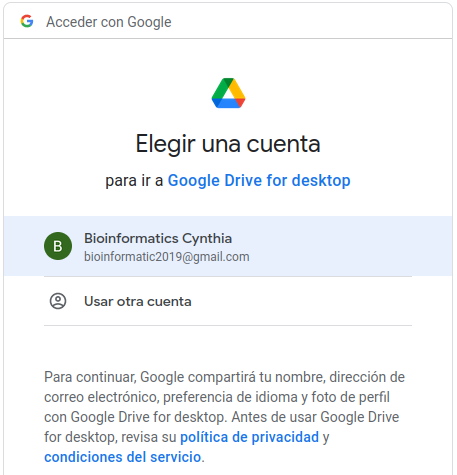


Figura 1. Elegir cuenta a la cual quieres acceder.


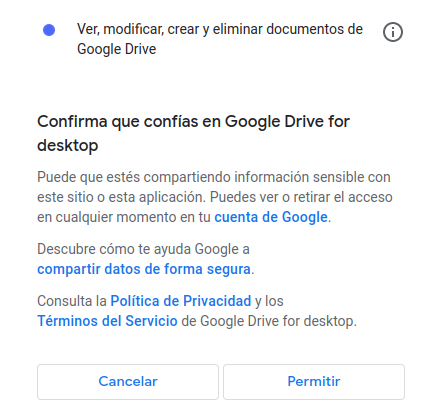


Figura 2. Confirmar el acuerdo de confiabilidad.


Una vez aceptado el acuerdo, recibirás una confirmación de respuesta en tu notebook confirmando que la unidad ha sido montada.

`Mounted at /content/drive`

3. Para buscar la ubicación exacta de tu archivo, la forma más fácil de encontrar la ruta es navegando por el árbol de directorios de Drive, el cual accedes en el menú de la barra lateral izquierda (figura 3). Los archivos de tu Drive se encuentran en la ruta content -> drive -> MyDrive ... o similar.


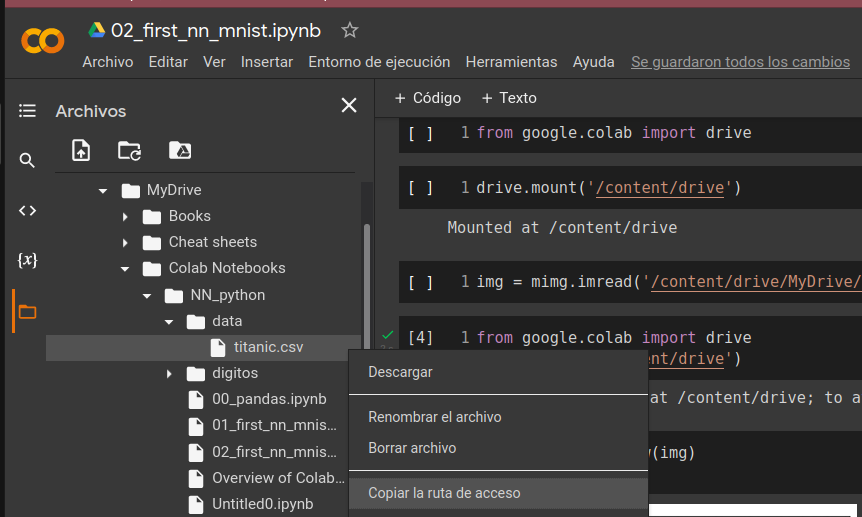

Figura 3. Menú lateral izquierdo del drive.

Localizado tu archivo, puedes desplegar el menú emergente y simplemente copiar la ruta de acceso; ya puedes asignar esta ruta a una variable para leer el archivo. En este ejemplo la asigno a la variable img.

`img = mimg.imread('/content/drive/MyDrive/Colab Notebooks/NN_python/digitos/cp.png')`

***2) DESDE TU DISCO***

Para acceder archivos de tu disco, puedes obtener la ruta en el mismo menú lateral en el icono de cargar archivos (flecha que apunta hacia arriba) de la barra superior del mismo menú; copiar la ruta y seguir las mismas instrucciones.


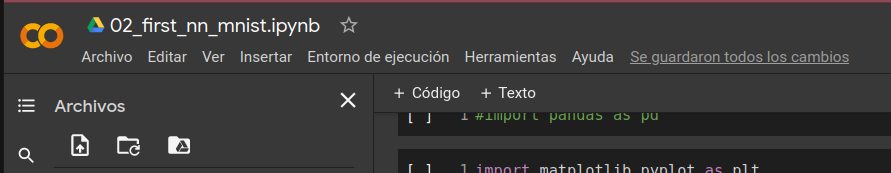

***3) DESDE GITHUB***

Primero debes copiar o clonar la ruta URL de github, y básicamente clonarlo en colab en una sola línea, como se ve en la imagen siguiente:
Primero copias la ruta https del github.
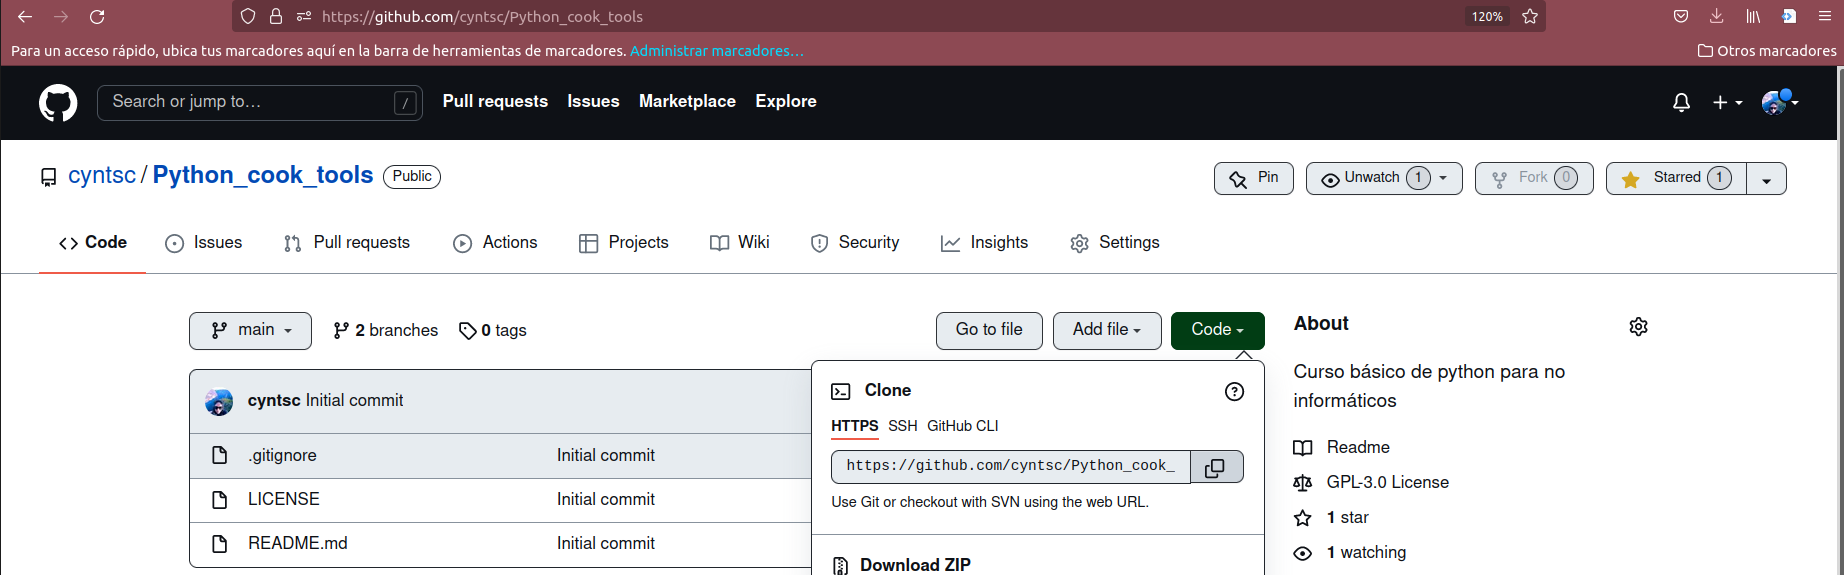

Posteriormente, la invocas junto con el comando !git clone

`!git clone "https://github.com/cyntsc/Python_cook_tools.git"`

Listo, los archivos clonados estarán en la carpeta content

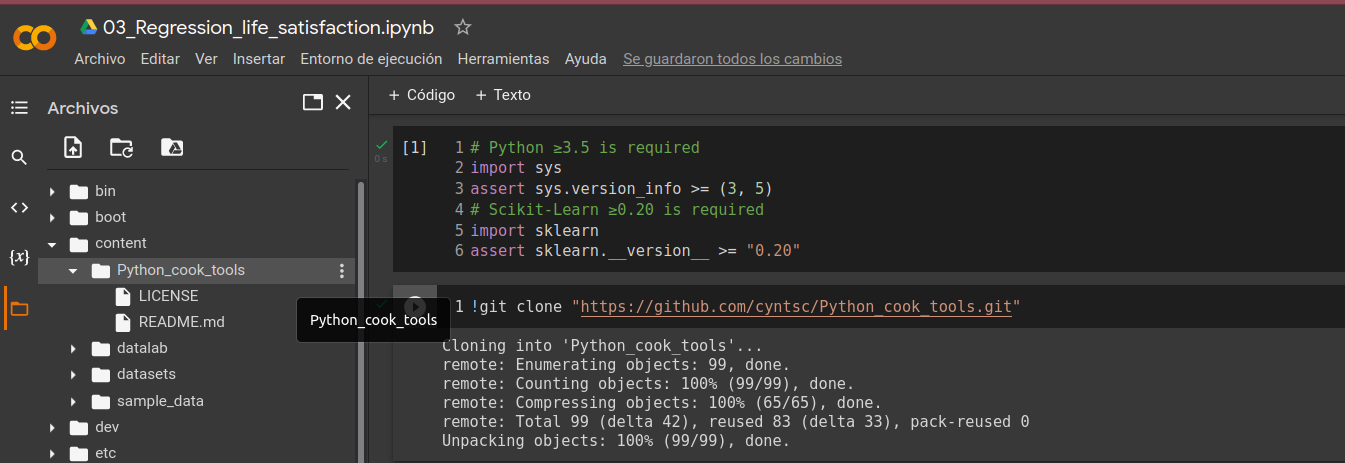


Espero te sea de utilidad.

In [100]:
from google.colab import drive #

In [101]:
!git clone "https://github.com/jcordovaj/ColabEjercicios"                                 # Clonamos el repo para acceder a los archivos y de ahí basta solo la URL

fatal: destination path 'ColabEjercicios' already exists and is not an empty directory.


In [102]:
url01 ='https://raw.githubusercontent.com/jcordovaj/ColabEjercicios/main/fifa-statistics.csv' # url es un nombre cualquiera, una variable
df = pd.read_csv(url01)                                                                       # La url se obtiene abriendo el archivo en GIT y obteniendo el RAW
print (df.head(5))

         Date          Team      Opponent  Goal Scored  Ball Possession %  \
0  14-06-2018        Russia  Saudi Arabia            5                 40   
1  14-06-2018  Saudi Arabia        Russia            0                 60   
2  15-06-2018         Egypt       Uruguay            0                 43   
3  15-06-2018       Uruguay         Egypt            1                 57   
4  15-06-2018       Morocco          Iran            0                 64   

   Attempts  On-Target  Off-Target  Blocked  Corners  ...  Yellow Card  \
0        13          7           3        3        6  ...            0   
1         6          0           3        3        2  ...            0   
2         8          3           3        2        0  ...            2   
3        14          4           6        4        5  ...            0   
4        13          3           6        4        5  ...            1   

   Yellow & Red  Red  Man of the Match  1st Goal        Round  PSO  \
0             0    0  

## Selección e Indexing

### loc e iloc

In [163]:
df.loc[0, 'Team']         # Retorna valor por la clave explícita, le debo "decir" que es la columna "Team"

'Russia'

In [164]:
df.iloc[0, [1]]           # Retorno un valor a través de la la clave 'IMPLÍCITA', es decir por el número (de 0  a 'n')

Team    Russia
Name: 0, dtype: object

In [165]:
df.iloc[2]                # ILOC, si argumentos, retorna toda la información del registro o fila (todas las columnas)

Date                       15-06-2018
Team                            Egypt
Opponent                      Uruguay
Goal Scored                         0
Ball Possession %                  43
Attempts                            8
On-Target                           3
Off-Target                          3
Blocked                             2
Corners                             0
Offsides                            1
Free Kicks                          7
Saves                               3
Pass Accuracy %                    78
Passes                            395
Distance Covered (Kms)            112
Fouls Committed                    12
Yellow Card                         2
Yellow & Red                        0
Red                                 0
Man of the Match                   No
1st Goal                          NaN
Round                     Group Stage
PSO                                No
Goals in PSO                        0
Own goals                         NaN
Own goal Tim

## Análisis descriptivo en Pandas

### describe, info y shape

In [172]:
df.describe()         # Si hago un DESCRIBE, toma toma todas las caracteristicas calculables y entrega un cuadro resumen con
                      # el conteo, la media, desviación estándar, valor mínimo, másximo, cuartiles, por columna o feature.

,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,...,Passes,Distance Covered (Kms),Fouls Committed,Yellow Card,Yellow & Red,Red,1st Goal,Goals in PSO,Own goals,Own goal Time
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,...,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,94.000000,128.000000,12.0,12.000000
mean,1.320312,49.992188,12.593750,3.914062,5.273438,3.359375,4.718750,1.343750,14.890625,2.726562,...,462.648438,106.664062,13.546875,1.695312,0.015625,0.015625,39.457447,0.203125,1.0,45.833333
std,1.156519,10.444074,5.245827,2.234403,2.409675,2.403195,2.446072,1.193404,4.724262,2.049447,...,151.186311,11.749537,4.619131,1.325454,0.124507,0.124507,24.496506,0.807049,0.0,29.978275
min,0.000000,25.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000,...,189.000000,80.000000,5.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0,12.000000
25%,0.000000,42.000000,9.000000,2.000000,4.000000,1.750000,3.000000,0.000000,11.000000,1.000000,...,351.000000,101.000000,10.000000,1.000000,0.000000,0.000000,18.250000,0.000000,1.0,21.750000
50%,1.000000,50.000000,12.000000,3.500000,5.000000,3.000000,5.000000,1.000000,15.000000,2.000000,...,462.000000,104.500000,13.000000,2.000000,0.000000,0.000000,39.000000,0.000000,1.0,35.000000
75%,2.000000,58.000000,15.000000,5.000000,7.000000,4.000000,6.000000,2.000000,18.000000,4.000000,...,555.250000,109.000000,16.000000,2.000000,0.000000,0.000000,54.750000,0.000000,1.0,75.750000
max,6.000000,75.000000,26.000000,12.000000,11.000000,10.000000,11.000000,5.000000,26.000000,9.000000,...,1137.000000,148.000000,25.000000,6.000000,1.000000,1.000000,90.000000,4.000000,1.0,90.000000


In [173]:
df.info()                             # Entrega cardinalidad o conteo de los valores no nulos y su tipo

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    128 non-null    object 
 1   Team                    128 non-null    object 
 2   Opponent                128 non-null    object 
 3   Goal Scored             128 non-null    int64  
 4   Ball Possession %       128 non-null    int64  
 5   Attempts                128 non-null    int64  
 6   On-Target               128 non-null    int64  
 7   Off-Target              128 non-null    int64  
 8   Blocked                 128 non-null    int64  
 9   Corners                 128 non-null    int64  
 10  Offsides                128 non-null    int64  
 11  Free Kicks              128 non-null    int64  
 12  Saves                   128 non-null    int64  
 13  Pass Accuracy %         128 non-null    int64  
 14  Passes                  128 non-null    in

In [174]:
df.shape        # Retorna la cardinalidad de la matriz, es decir número de filas por número de columnas (128 filas y 27 columnas)

(128, 27)

In [175]:
df.columns      # Retorna una lista con los nombres de las columnas o features

Index(['Date', 'Team', 'Opponent', 'Goal Scored', 'Ball Possession %',
       'Attempts', 'On-Target', 'Off-Target', 'Blocked', 'Corners', 'Offsides',
       'Free Kicks', 'Saves', 'Pass Accuracy %', 'Passes',
       'Distance Covered (Kms)', 'Fouls Committed', 'Yellow Card',
       'Yellow & Red', 'Red', 'Man of the Match', '1st Goal', 'Round', 'PSO',
       'Goals in PSO', 'Own goals', 'Own goal Time'],
      dtype='object')

In [181]:
df.head(3) # Head retorna las X primeras filas, por defecto son 5 

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,...,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,14-06-2018,Russia,Saudi Arabia,5,40,13,7,3,3,6,...,0,0,0,Yes,12.0,Group Stage,No,0,NaN,NaN
1,14-06-2018,Saudi Arabia,Russia,0,60,6,0,3,3,2,...,0,0,0,No,NaN,Group Stage,No,0,NaN,NaN
2,15-06-2018,Egypt,Uruguay,0,43,8,3,3,2,0,...,2,0,0,No,NaN,Group Stage,No,0,NaN,NaN


In [182]:
df.tail(4) # Retorna las Y últimas filas, por defecto 5

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,...,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
124,14-07-2018,Belgium,England,2,43,12,4,3,5,4,...,1,0,0,Yes,4.0,3rd Place,No,0,NaN,NaN
125,14-07-2018,England,Belgium,0,57,15,5,7,3,5,...,2,0,0,No,NaN,3rd Place,No,0,NaN,NaN
126,15-07-2018,France,Croatia,4,39,8,6,1,1,2,...,2,0,0,Yes,18.0,Final,No,0,1.0,18.0
127,15-07-2018,Croatia,France,2,61,15,3,8,4,6,...,1,0,0,No,28.0,Final,No,0,NaN,NaN


### unique y value_counts()

In [178]:
df['Team'].unique()           # Retorna valores únicos para una característica o columna, es una lista

array(['Russia', 'Saudi Arabia', 'Egypt', 'Uruguay', 'Morocco', 'Iran',
       'Portugal', 'Spain', 'France', 'Australia', 'Argentina', 'Iceland',
       'Peru', 'Denmark', 'Croatia', 'Nigeria', 'Costa Rica', 'Serbia',
       'Germany', 'Mexico', 'Brazil', 'Switzerland', 'Sweden',
       'Korea Republic', 'Belgium', 'Panama', 'Tunisia', 'England',
       'Colombia', 'Japan', 'Poland', 'Senegal'], dtype=object)

In [179]:
df.Team.value_counts()       # Retorna el conteo de elementos iguales en una columna, la veces que aparece

Belgium           7
Croatia           7
France            7
England           7
Russia            5
Brazil            5
Uruguay           5
Sweden            5
Switzerland       4
Denmark           4
Argentina         4
Spain             4
Portugal          4
Colombia          4
Japan             4
Mexico            4
Tunisia           3
Panama            3
Korea Republic    3
Poland            3
Costa Rica        3
Germany           3
Serbia            3
Saudi Arabia      3
Nigeria           3
Peru              3
Iceland           3
Australia         3
Iran              3
Morocco           3
Egypt             3
Senegal           3
Name: Team, dtype: int64

### count, min, max, mean, median, std y corr


In [180]:
df.corr()

,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,...,Passes,Distance Covered (Kms),Fouls Committed,Yellow Card,Yellow & Red,Red,1st Goal,Goals in PSO,Own goals,Own goal Time
Goal Scored,1.000000,0.034759,0.144915,0.461702,-0.020374,-0.087072,0.040446,0.045105,0.046815,-0.118893,...,0.043971,0.014355,0.030331,-0.048838,-0.035031,-0.089714,-0.272170,-0.011204,NaN,-0.228729
Ball Possession %,0.034759,1.000000,0.541185,0.297234,0.361767,0.521510,0.542992,0.057706,0.273831,-0.293658,...,0.880611,-0.059054,-0.296477,-0.205511,0.090924,0.024316,-0.048316,-0.010086,NaN,0.588196
Attempts,0.144915,0.541185,1.000000,0.731243,0.718972,0.754307,0.686892,-0.016508,0.140850,-0.268217,...,0.582831,0.171381,-0.248773,-0.185544,-0.074594,0.009795,0.072737,0.149836,NaN,-0.012727
On-Target,0.461702,0.297234,0.731243,1.000000,0.324672,0.331333,0.407576,0.073176,0.093090,-0.321557,...,0.348099,0.065475,-0.192242,-0.115259,-0.051742,-0.023439,-0.071730,0.040322,NaN,-0.328175
Off-Target,-0.020374,0.361767,0.718972,0.324672,1.000000,0.299712,0.440633,-0.095919,0.142367,-0.126644,...,0.398949,0.229930,-0.186858,-0.124094,-0.145577,-0.119332,0.109203,0.185807,NaN,0.300204
Blocked,-0.087072,0.521510,0.754307,0.331333,0.299712,1.000000,0.636172,-0.002231,0.086021,-0.142960,...,0.532913,0.082111,-0.174606,-0.163111,0.033717,0.165295,0.091321,0.108220,NaN,0.014851
Corners,0.040446,0.542992,0.686892,0.407576,0.440633,0.636172,1.000000,-0.034054,0.085216,-0.233787,...,0.524661,0.099700,-0.165382,-0.169929,0.014543,0.117960,0.163760,0.088997,NaN,0.023942
Offsides,0.045105,0.057706,-0.016508,0.073176,-0.095919,-0.002231,-0.034054,1.000000,0.089121,0.006539,...,0.034715,0.031324,-0.040084,-0.047757,0.228531,-0.036432,-0.112602,-0.064892,NaN,-0.312680
Free Kicks,0.046815,0.273831,0.140850,0.093090,0.142367,0.086021,0.085216,0.089121,1.000000,-0.231637,...,0.175695,0.076927,0.080341,-0.026741,0.029701,-0.104164,-0.007801,0.138046,NaN,-0.057103
Saves,-0.118893,-0.293658,-0.268217,-0.321557,-0.126644,-0.142960,-0.233787,0.006539,-0.231637,1.000000,...,-0.264425,0.125645,0.074976,0.009670,0.140307,0.016875,-0.127567,0.110014,NaN,-0.063865


## Precentiles

Son una medida usada en estadística que indica el valor de la variable por debajo del cual se encuentra un porcentaje dado de observaciones. Ahora los Cuantiles son puntos tomados a intervalos regulares de la función de distribución de una variable aleatoria. Los cuantiles podemos usarlos por grupos que dividan la distribución en partes iguales; obteniendo sus hijos, los Percentiles, Deciles y Quartiles.

In [115]:
df['Distance Covered (Kms)'].quantile(0.5) # 10th percentile

104.5

In [116]:
df['Distance Covered (Kms)'].median()

104.5

### Ordenando datos

In [117]:
df.sort_index()

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,...,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,14-06-2018,Russia,Saudi Arabia,5,40,13,7,3,3,6,...,0,0,0,Yes,12.0,Group Stage,No,0,NaN,NaN
1,14-06-2018,Saudi Arabia,Russia,0,60,6,0,3,3,2,...,0,0,0,No,NaN,Group Stage,No,0,NaN,NaN
2,15-06-2018,Egypt,Uruguay,0,43,8,3,3,2,0,...,2,0,0,No,NaN,Group Stage,No,0,NaN,NaN
3,15-06-2018,Uruguay,Egypt,1,57,14,4,6,4,5,...,0,0,0,Yes,89.0,Group Stage,No,0,NaN,NaN
4,15-06-2018,Morocco,Iran,0,64,13,3,6,4,5,...,1,0,0,No,NaN,Group Stage,No,0,1.0,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,11-07-2018,England,Croatia,1,46,11,1,6,4,4,...,1,0,0,No,5.0,Semi- Finals,No,0,NaN,NaN
124,14-07-2018,Belgium,England,2,43,12,4,3,5,4,...,1,0,0,Yes,4.0,3rd Place,No,0,NaN,NaN
125,14-07-2018,England,Belgium,0,57,15,5,7,3,5,...,2,0,0,No,NaN,3rd Place,No,0,NaN,NaN
126,15-07-2018,France,Croatia,4,39,8,6,1,1,2,...,2,0,0,Yes,18.0,Final,No,0,1.0,18.0


In [118]:
df.sort_values(["Goal Scored"], ascending=False).head()

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,...,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
58,24-06-2018,England,Panama,6,58,12,7,3,2,3,...,1,0,0,Yes,8.0,Group Stage,No,0,NaN,NaN
0,14-06-2018,Russia,Saudi Arabia,5,40,13,7,3,3,6,...,0,0,0,Yes,12.0,Group Stage,No,0,NaN,NaN
52,23-06-2018,Belgium,Tunisia,5,52,23,12,8,3,5,...,0,0,0,Yes,6.0,Group Stage,No,0,NaN,NaN
126,15-07-2018,France,Croatia,4,39,8,6,1,1,2,...,2,0,0,Yes,18.0,Final,No,0,1.0,18.0
96,30-06-2018,France,Argentina,4,41,9,4,4,1,0,...,3,0,0,Yes,13.0,Round of 16,No,0,NaN,NaN


### Tablas Dinamicas

In [119]:
import numpy as np

In [120]:
df.pivot_table(index='Team', columns='Round', values='Goal Scored', aggfunc=np.sum)

Round,3rd Place,Final,Group Stage,Quarter Finals,Round of 16,Semi- Finals
Team,,,,,,
Argentina,NaN,NaN,3.0,NaN,3.0,NaN
Australia,NaN,NaN,2.0,NaN,NaN,NaN
Belgium,2.0,NaN,9.0,2.0,3.0,0.0
Brazil,NaN,NaN,5.0,1.0,2.0,NaN
Colombia,NaN,NaN,5.0,NaN,1.0,NaN
Costa Rica,NaN,NaN,2.0,NaN,NaN,NaN
Croatia,NaN,2.0,7.0,2.0,1.0,2.0
Denmark,NaN,NaN,2.0,NaN,1.0,NaN
Egypt,NaN,NaN,2.0,NaN,NaN,NaN


## Combinando datasets

### concat y append 

In [121]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                    'B': ['B0', 'B1', 'B2', 'B3'],
                    'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3']},
                    index=[0, 1, 2, 3])
   

df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                    'B': ['B4', 'B5', 'B6', 'B7'],
                    'C': ['C4', 'C5', 'C6', 'C7'],
                    'D': ['D4', 'D5', 'D6', 'D7']},
                    index=[4, 5, 6, 7])


df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                    'B': ['B8', 'B9', 'B10', 'B11'],
                    'C': ['C8', 'C9', 'C10', 'C11']},
                    index=[8, 9, 10, 11])

frames = [df1, df2, df3]


In [122]:
df3

,A,B,C
8,A8,B8,C8
9,A9,B9,C9
10,A10,B10,C10
11,A11,B11,C11


In [123]:
pd.concat(frames)

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,NaN
9,A9,B9,C9,NaN


In [124]:
df4 = pd.DataFrame({'B': ['B2', 'B3', 'B6', 'B7'],
                    'D': ['D2', 'D3', 'D6', 'D7'],
                    'F': ['F2', 'F3', 'F6', 'F7']},
                     index=[2, 3, 6, 7])
df4

,B,D,F
2,B2,D2,F2
3,B3,D3,F3
6,B6,D6,F6
7,B7,D7,F7


In [125]:
frames = [df1, df2, df3, df4]
pd.concat(frames)

,A,B,C,D,F
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
4,A4,B4,C4,D4,NaN
5,A5,B5,C5,D5,NaN
6,A6,B6,C6,D6,NaN
7,A7,B7,C7,D7,NaN
8,A8,B8,C8,NaN,NaN
9,A9,B9,C9,NaN,NaN


In [126]:
pd.concat([df1, df4], axis=1) # Concatenación horizontal

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3
6,NaN,NaN,NaN,NaN,B6,D6,F6
7,NaN,NaN,NaN,NaN,B7,D7,F7


In [127]:
pd.concat([df1, df4], axis=1, join='inner') # Cambiando la forma de concatenar con join

,A,B,C,D,B,D,F
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


In [128]:
df1.append(df2) # Append es otra forma de fácilmente concatenerar

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


### Merge

In [129]:
left = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                    'A': ['A0', 'A1', 'A2', 'A3'],
                    'B': ['B0', 'B1', 'B2', 'B3']})


right = pd.DataFrame({'key': ['K0', 'K1', 'K2'],
                    'C': ['C0', 'C1', 'C2'],
                    'D': ['D0', 'D1', 'D2']})


pd.merge(left, right, on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2


In [130]:
import numpy as np

## Apply y Map

### apply

In [131]:
usuarios_df = pd.DataFrame({'edad': [np.nan, 20, 41, 20],
                            'clics_por_hora': [156, np.nan, 210, 210]})
usuarios_df

,edad,clics_por_hora
0,NaN,156.0
1,20.0,NaN
2,41.0,210.0
3,20.0,210.0


In [132]:
import numpy as np
usuarios2 = usuarios_df.apply(np.mean) # Se puede aplicar cualquier función que toma una fila o columna por entrada.

In [133]:
usuarios2

edad               27.0
clics_por_hora    192.0
dtype: float64

In [134]:
usuarios_df

,edad,clics_por_hora
0,NaN,156.0
1,20.0,NaN
2,41.0,210.0
3,20.0,210.0


### applymap

In [135]:
usuarios_df.applymap(lambda x: x/2) # Se aplica elemento a elemento. En las series podemos usar directamente serie.map

,edad,clics_por_hora
0,NaN,78.0
1,10.0,NaN
2,20.5,105.0
3,10.0,105.0


## Missing values

### Filtrando valores faltantes

In [136]:
usuarios_df

,edad,clics_por_hora
0,NaN,156.0
1,20.0,NaN
2,41.0,210.0
3,20.0,210.0


In [137]:
usuarios_df.isna()

,edad,clics_por_hora
0,True,False
1,False,True
2,False,False
3,False,False


In [138]:
u2 = usuarios_df.dropna()  # Puede borrarse toda fila que contenga un NaN o solamente en las columnas que especificamos

In [139]:
u2

,edad,clics_por_hora
2,41.0,210.0
3,20.0,210.0


In [140]:
usuarios_df

,edad,clics_por_hora
0,NaN,156.0
1,20.0,NaN
2,41.0,210.0
3,20.0,210.0


In [141]:
usuarios_df.dropna(subset=['edad'])

,edad,clics_por_hora
1,20.0,NaN
2,41.0,210.0
3,20.0,210.0


In [142]:
copia_df = usuarios_df

In [143]:
usuarios_df

,edad,clics_por_hora
0,NaN,156.0
1,20.0,NaN
2,41.0,210.0
3,20.0,210.0


### Completando valores 

In [144]:
usuarios_df = pd.DataFrame({'edad': [np.nan, 20, 41, 20, 22, 25],
                            'clics_por_hora': [156, np.nan, 210, 210, 100, np.nan],
                            'genero': ['m','f','f','f','m','f']})
usuarios_df

,edad,clics_por_hora,genero
0,NaN,156.0,m
1,20.0,NaN,f
2,41.0,210.0,f
3,20.0,210.0,f
4,22.0,100.0,m
5,25.0,NaN,f


In [145]:
usuarios_df_m = usuarios_df[usuarios_df['genero'] == 'm']

In [146]:
usuarios_df_f = usuarios_df[usuarios_df['genero'] == 'f']

In [147]:
usuarios_df_f['edad'].fillna(usuarios_df_f.edad.mean())

1    20.0
2    41.0
3    20.0
5    25.0
Name: edad, dtype: float64

In [148]:
usuarios_df_m['edad'].fillna(usuarios_df_m.edad.mean())

0    22.0
4    22.0
Name: edad, dtype: float64

In [149]:
copia_df['edad'].fillna(usuarios_df.edad.mean())

0    25.6
1    20.0
2    41.0
3    20.0
Name: edad, dtype: float64

In [150]:
copia_df['edad'].fillna(usuarios_df.edad.mean())

0    25.6
1    20.0
2    41.0
3    20.0
Name: edad, dtype: float64

In [151]:
copia_df.fillna(0)

,edad,clics_por_hora
0,0.0,156.0
1,20.0,0.0
2,41.0,210.0
3,20.0,210.0


In [152]:
copia_df

,edad,clics_por_hora
0,NaN,156.0
1,20.0,NaN
2,41.0,210.0
3,20.0,210.0


In [153]:
copia_df1 = copia_df.fillna(usuarios_df.edad.mean()) # Podemos elegir con qué completar los valores faltantes., inplace=True

In [154]:
copia_df1

,edad,clics_por_hora
0,25.6,156.0
1,20.0,25.6
2,41.0,210.0
3,20.0,210.0


In [155]:
copia_df.fillna(usuarios_df.edad.mean(), inplace=True) # Podemos elegir con qué completar los valores faltantes.

In [156]:
copia_df

,edad,clics_por_hora
0,25.6,156.0
1,20.0,25.6
2,41.0,210.0
3,20.0,210.0


### Borrando duplicados

In [157]:
usuarios_df = pd.DataFrame({'edad': [np.nan, 20, 41, 20, 20, 41],
                            'clics_por_hora': [156, np.nan, 210, 210, 100, np.nan],
                            'genero': ['m','f','f','f','m','f']})
usuarios_df

,edad,clics_por_hora,genero
0,NaN,156.0,m
1,20.0,NaN,f
2,41.0,210.0,f
3,20.0,210.0,f
4,20.0,100.0,m
5,41.0,NaN,f


In [158]:
usuarios_df.drop_duplicates(subset=['clics_por_hora'], keep='last', inplace=True) # Se puede jugar con el first, last, etc. Y también elegir en qué columnas

In [159]:
usuarios_df

,edad,clics_por_hora,genero
0,NaN,156.0,m
3,20.0,210.0,f
4,20.0,100.0,m
5,41.0,NaN,f


In [160]:
usuarios_df.drop_duplicates(subset=['genero']) # Se puede jugar con el first, last, etc. Y también elegir en qué columnas

,edad,clics_por_hora,genero
0,NaN,156.0,m
3,20.0,210.0,f


In [161]:
import pandas as pd
ejemplo = pd.DataFrame({'campo1': [None, 20, 41, 20], 'campo2': [156, None, 210, 210]})
ejemplo

,campo1,campo2
0,NaN,156.0
1,20.0,NaN
2,41.0,210.0
3,20.0,210.0


In [162]:
ejemplo.fillna(ejemplo.campo2.mean(), inplace=True)
ejemplo.fillna(ejemplo.campo1.mode()) #, inplace=True)
ejemplo

,campo1,campo2
0,192.0,156.0
1,20.0,192.0
2,41.0,210.0
3,20.0,210.0
